In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msn
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_labels = train[train.Embarked.notna()]['Survived']
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [8]:
train_labels.shape

(889,)

In [9]:
train_features = train.drop(columns = ['Survived', "PassengerId"], axis = 1)

In [10]:
train_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


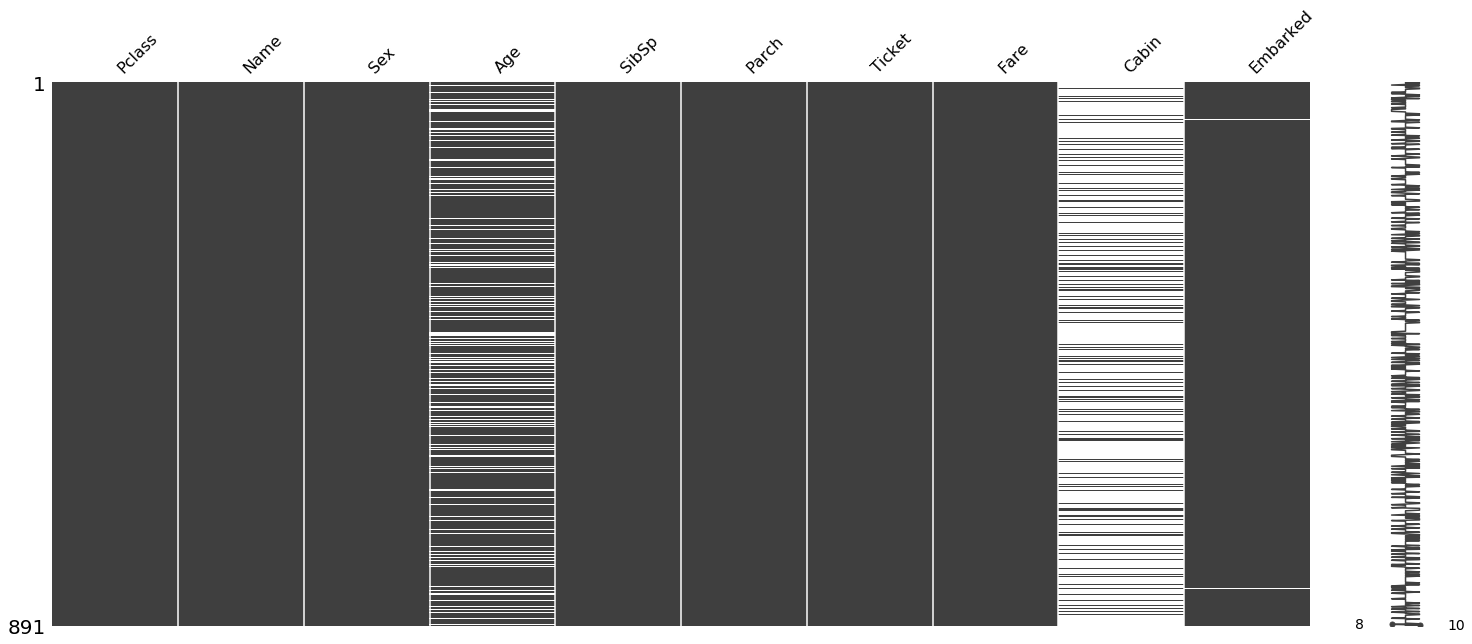

In [11]:
msn.matrix(train_features)

In [12]:
train_features = train_features[train_features.Embarked.notna()]

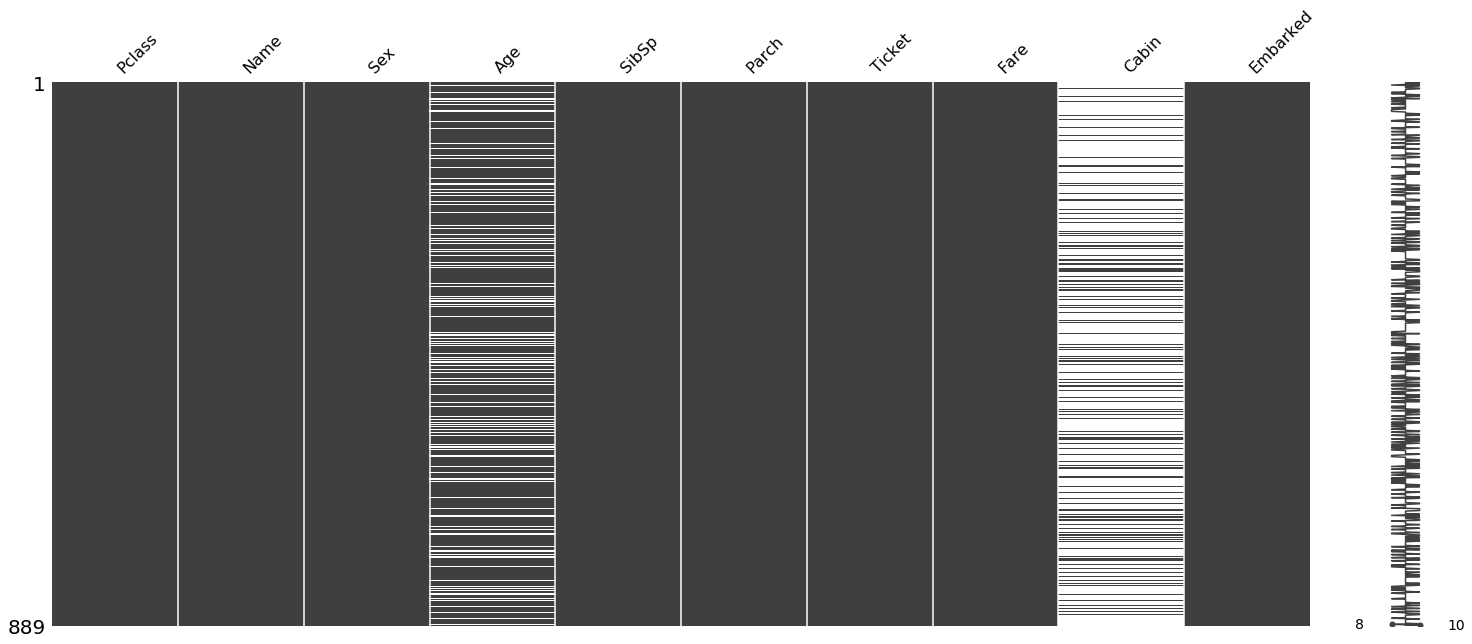

In [13]:
msn.matrix(train_features)

### Dealing with missing values from age and cabin
* need to make decision if should be better to keep cabin as a feature


* looking at details of the two columns


In [14]:
train_features[['Age', 'Cabin']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     712 non-null    float64
 1   Cabin   202 non-null    object 
dtypes: float64(1), object(1)
memory usage: 20.8+ KB


* how many rows are null in age and cabin columns:

In [15]:
train_features[['Age', 'Cabin']].isnull().sum()

Age      177
Cabin    687
dtype: int64

* how many rows are not null in the two cabins mentioned above:

In [16]:
train_features[['Age', 'Cabin']].notna().sum()

Age      712
Cabin    202
dtype: int64

* I'm not convinced I can salvage much data from Cabin since is only about 20/23% good data out of the total number of entries
 
* Could compensate with name title as a feature, and completing missing age values


* missing age values strategies:
    * regression 
    * fill with mean

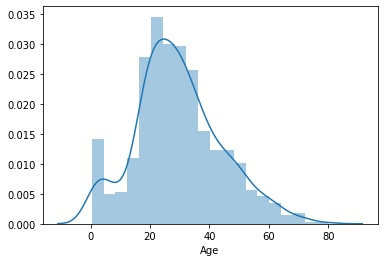

In [17]:
sns.distplot(train_features['Age'])

* my first model involved replacing the missing values of the age variable with the mean
* this time my attempt will be creating a linear regression model to fill the missing values

In [18]:
# importing the necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

* splitting the data
* the linear regression will be trained on the rows that have values and predict the ones that have not
* the features will be:
    * the apelative (mr., mss. etc that will be made shortly)
    * sex
    * sibsp
    * parch
    

In [19]:
train_features.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [20]:
train_features[['Name']].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [21]:
train_features['Name'] = train_features.Name.str.extract(" (\w+)\.", expand = False)
train_features[['Name']].head(10)

,Name
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [22]:
train_features.rename(columns={'Name':'Title'}, inplace = True)

In [23]:
train_features.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [24]:
LR_data = train_features[['Pclass', 'Title','Age', 'Sex', 'SibSp', 'Parch']]
LR_labels = train_features['Age']

In [25]:
LR_data_training = LR_data[LR_data.Age.notna()]
LR_data_test = LR_data[LR_data.Age.isnull()]

LR_data_training = LR_data_training[['Pclass', 'Title', 'Sex', 'SibSp', 'Parch']]
LR_data_test = LR_data_test[['Pclass', 'Title', 'Sex', 'SibSp', 'Parch']]

In [26]:
LR_labels_training = LR_labels[LR_labels.notna()]
LR_labels_test = LR_labels[LR_labels.isnull()]

In [27]:
LR_data_training.head(10)

,Pclass,Title,Sex,SibSp,Parch
0,3,Mr,male,1,0
1,1,Mrs,female,1,0
2,3,Miss,female,0,0
3,1,Mrs,female,1,0
4,3,Mr,male,0,0
6,1,Mr,male,0,0
7,3,Master,male,3,1
8,3,Mrs,female,0,2
9,2,Mrs,female,1,0
10,3,Miss,female,1,1


In [28]:
LR_labels_training.head(10)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64

In [32]:
LR_data_training_copy = LR_data_training.copy()
LR_data_training_copy.columns

Index(['Pclass', 'Title', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [70]:
df = pd.get_dummies(LR_data_training_copy, columns = ['Pclass','Title', 'Sex',])
df = df

In [71]:
LR = LinearRegression()
LR.fit(df, LR_labels_training)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
from sklearn.metrics import r2_score
pred = LR.predict(df)
r2_score( LR_labels_training, pred)

0.4246270914762408

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [82]:
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

dtr.fit(df, LR_labels_training)
rfr.fit(df, LR_labels_training)




RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
dtr.score(df, LR_labels_training)


0.545802150002052

In [76]:
rfr.score(df, LR_labels_training)


0.538761479852879

In [80]:
from sklearn.svm import SVR

svr= SVR()
svr.fit(df, LR_labels_training)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
svr.score(df, LR_labels_training)

0.3464291716444562